<a href="https://colab.research.google.com/github/masa512/543_final/blob/main/set2_prob8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part a

In [1]:
import numpy as np
import scipy
import scipy.signal
from skimage import data
import matplotlib.pyplot as plt


In [2]:
def sepconv2(X,h1,h2):
  
  # First perform along axis 1 (column) with h1

  Y1 = np.array([scipy.signal.convolve(X[i,:],h1,'same') for i in range(X.shape[0])])

  # Perform along axis 2 (row) with h2

  Y2 = np.array([scipy.signal.convolve(Y1[:,j],h2,'same') for j in range(Y1.shape[1])]).T

  return Y2

In [3]:
# Testing

# Read image
X = data.camera()[::5,::5]

# Define two kernels
w1 = 2
w2 = 2

h1 = 1/w1*np.ones(w1)
h2 = 1/w2*np.ones(w2)

# Perform convolution
Y = sepconv2(X,h1,h2)

print(X.shape,Y.shape)

(103, 103) (103, 103)


Text(0.5, 1.0, 'Convolved Output')

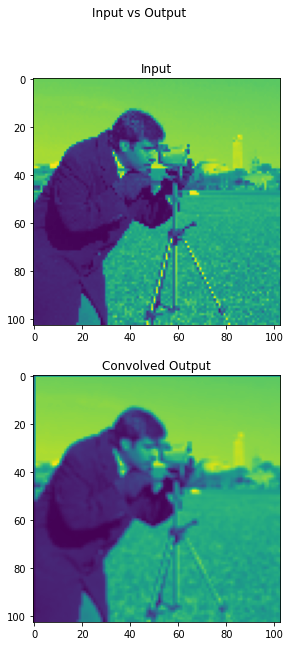

In [4]:
# Plot images

fig, axes = plt.subplots(2,figsize=(20, 10))
fig.suptitle('Input vs Output')
axes[0].imshow(X)
axes[0].set_title('Input')

axes[1].imshow(Y)
axes[1].set_title('Convolved Output')





## Part b

In [5]:
def cconv(x,h,N):
  # Pad either one to match the other

  hpad = np.pad(h,(0,N-h.shape[0]),constant_values=(0,0))
  xpad = np.pad(x,(0,N-x.shape[0]),constant_values=(0,0))

  # Perform FFT on both x and h

  X = np.fft.fft(xpad)
  H = np.fft.fft(hpad)

  Y = X*H

  # IFFT
  y = np.fft.ifft(Y)

  return np.real(y)

def cconv_mtx(h,N):

  basis_vectors = np.diag(np.ones(N))

  C = np.array([cconv(basis_vectors[i],h,N) for i in range(N)])

  return C

def sepconvmtx2(h1,h2,N1,N2):

  # Generate H1 and H2
  H1 = cconv_mtx(h1,N1)
  H2 = cconv_mtx(h1,N2)

  return np.kron(H2,H1)

In [6]:
# Set N1 and N2

sz1,sz2 = X.shape
L1,L2 = h1.shape[0],h2.shape[0]

N1,N2 = sz1,sz2

# Run sepconvmtx2
H = sepconvmtx2(h1,h2,N1,N2)

In [7]:
# Vectorize matrix X
x = X.reshape((-1,1))

In [8]:
# Evaluate output Y
Y1 =(H@x).reshape((X.shape[0],X.shape[1]))

Text(0.5, 1.0, 'Convolved Output from sepconv2')

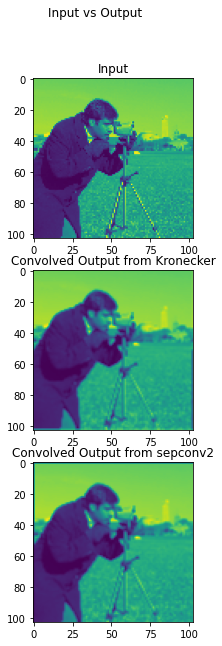

In [9]:
fig, axes = plt.subplots(3,figsize=(20, 10))
fig.suptitle('Input vs Output')
axes[0].imshow(X)
axes[0].set_title('Input')

axes[1].imshow(Y1)
axes[1].set_title('Convolved Output from Kronecker')

axes[2].imshow(Y)
axes[2].set_title('Convolved Output from sepconv2')